In [1]:
# =====================================================
# Import library
# =====================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    accuracy_score
)


import json

# Tema biru
sns.set(style="whitegrid")
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=["#0d47a1"])

# Gunakan palet biru
sns.set(style="whitegrid", palette="Blues_d")

# Warna biru utama
BLUE = "#1E88E5"

In [2]:
# =====================================================
# Path penting
# =====================================================
DATA_PATH = "Tingkat_Kemiskinan_Indonesia.csv"
MODEL_DIR = "model"
CHART_DIR = "static/charts"

os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(CHART_DIR, exist_ok=True)

In [3]:
# =====================================================
# Baca data
# =====================================================
df = pd.read_csv(DATA_PATH)

print("5 data teratas:")
display(df.head())

print("\nInfo data:")
print(df.info())

print("\nStatistik deskriptif:")
display(df.describe(include='all'))

print("\nCek missing value:")
print(df.isnull().sum())

# Isi nilai kosong jika ada
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

print("\nSetelah imputasi missing value:")
print(df.isnull().sum())

5 data teratas:


,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Umur Harapan Hidup (Tahun),Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
0,ACEH,Simeulue,18.98,9.48,7148,66.41,65.28,71.56,87.45,5.71,71.15,1648096,0
1,ACEH,Aceh Singkil,20.36,8.68,8776,69.22,67.43,69.56,78.58,8.36,62.85,1780419,1
2,ACEH,Aceh Selatan,13.18,8.88,8180,67.44,64.40,62.55,79.65,6.46,60.85,4345784,0
3,ACEH,Aceh Tenggara,13.41,9.67,8030,69.44,68.22,62.71,86.71,6.43,69.62,3487157,0
4,ACEH,Aceh Timur,14.45,8.21,8577,67.83,68.74,66.75,83.16,7.13,59.48,8433526,0



Info data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Provinsi                                                              514 non-null    object 
 1   Kab/Kota                                                              514 non-null    object 
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)       514 non-null    float64
 3   Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                           514 non-null    float64
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)          514 non-null    int64  
 5   Indeks Pembangunan Manusia                                            514 non-null    float64
 6   Umur Harapan Hidup (Tahun)                                            514 non-null    

,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Umur Harapan Hidup (Tahun),Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
count,514,514,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,5.140000e+02,514.000000
unique,34,514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,JAWA TIMUR,Kota Jayapura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,38,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,12.273152,8.436615,10324.787938,69.926770,69.656809,77.202237,85.136615,5.059494,69.464455,2.196408e+07,0.120623
std,NaN,NaN,7.458703,1.630842,2717.144186,6.497033,3.447464,18.583555,15.701658,2.636970,6.396405,4.790492e+07,0.326005
min,NaN,NaN,2.380000,1.420000,3976.000000,32.840000,55.430000,0.000000,0.000000,0.000000,56.390000,1.474850e+05,0.000000
25%,NaN,NaN,7.150000,7.510000,8574.000000,66.642500,67.387500,70.217500,79.042500,3.180000,65.070000,3.654292e+06,0.000000
50%,NaN,NaN,10.455000,8.305000,10196.500000,69.610000,69.975000,81.800000,89.795000,4.565000,68.955000,8.814926e+06,0.000000
75%,NaN,NaN,14.887500,9.337500,11719.000000,73.112500,72.042500,89.882500,96.400000,6.530000,72.342500,1.973510e+07,0.000000



Cek missing value:
Provinsi                                                                0
Kab/Kota                                                                0
Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)         0
Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                             0
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)            0
Indeks Pembangunan Manusia                                              0
Umur Harapan Hidup (Tahun)                                              0
Persentase rumah tangga yang memiliki akses terhadap sanitasi layak     0
Persentase rumah tangga yang memiliki akses terhadap air minum layak    0
Tingkat Pengangguran Terbuka                                            0
Tingkat Partisipasi Angkatan Kerja                                      0
PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)              0
Klasifikasi Kemiskinan                                                  0
dtype: int64

Sete

In [4]:
# =====================================================
# Encode provinsi & kab/kota + target
# =====================================================
label_prov = LabelEncoder()
label_kab = LabelEncoder()

df['Provinsi_lbl'] = label_prov.fit_transform(df['Provinsi'])
df['KabKota_lbl'] = label_kab.fit_transform(df['Kab/Kota'])

df['Kemiskinan_lbl'] = df['Klasifikasi Kemiskinan']

In [5]:
# =====================================================
# Fitur & target
# =====================================================
fitur = [
    'Provinsi_lbl',
    'KabKota_lbl',
    'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)',
    'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)',
    'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)',
    'Indeks Pembangunan Manusia',
    'Umur Harapan Hidup (Tahun)',
    'Persentase rumah tangga yang memiliki akses terhadap sanitasi layak',
    'Persentase rumah tangga yang memiliki akses terhadap air minum layak',
    'Tingkat Pengangguran Terbuka',
    'Tingkat Partisipasi Angkatan Kerja',
    'PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)',
]

X = df[fitur]
y = df['Kemiskinan_lbl']

print("Shape X:", X.shape)
print("Shape y:", y.shape)


Shape X: (514, 12)
Shape y: (514,)


In [6]:
# =====================================================
# Train-test split
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training:", X_train.shape)
print("Testing :", X_test.shape)
# =====================================================
# Model Random Forest
# =====================================================
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
print("✅ Model Random Forest berhasil dilatih.")
BLUE = "#0d47a1"  # warna biru elegan

Training: (411, 12)
Testing : (103, 12)
✅ Model Random Forest berhasil dilatih.


In [7]:
# =====================================================
# EVALUASI MODEL
# =====================================================

# Prediksi
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("Akurasi:", accuracy_score(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        91
           1       0.86      1.00      0.92        12

    accuracy                           0.98       103
   macro avg       0.93      0.99      0.96       103
weighted avg       0.98      0.98      0.98       103

Akurasi: 0.9805825242718447


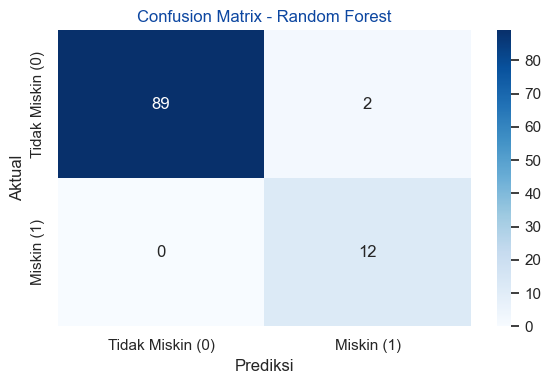

In [8]:
# =====================================================
# CONFUSION MATRIX
# =====================================================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=['Tidak Miskin (0)', 'Miskin (1)'],
    yticklabels=['Tidak Miskin (0)', 'Miskin (1)']
)
plt.title("Confusion Matrix - Random Forest", color=BLUE)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.savefig(os.path.join(CHART_DIR, "confusion.png"), dpi=120)
plt.show()

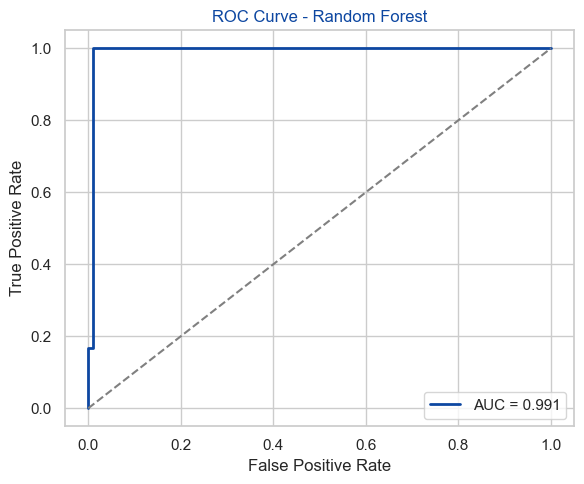

In [9]:
# =====================================================
# ROC CURVE
# =====================================================
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", color=BLUE, linewidth=2)
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("ROC Curve - Random Forest", color=BLUE)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(CHART_DIR, "roc.png"), dpi=120)
plt.show()

C:\Users\royba\AppData\Local\Temp\ipykernel_2080\3521282172.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


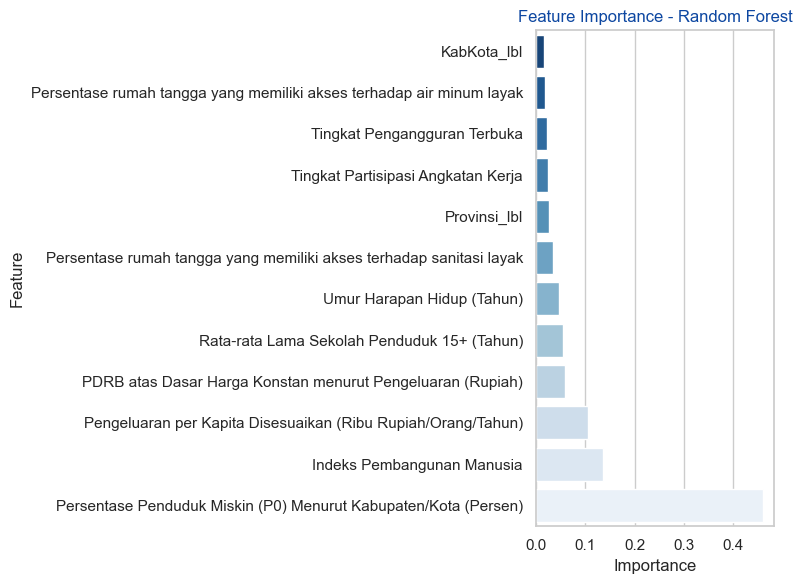

In [10]:
# =====================================================
# Feature Importance
# =====================================================
importance = pd.DataFrame({
    "Feature": fitur,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=True)

plt.figure(figsize=(8, 6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=importance,
    palette="Blues_r"
)
plt.title("Feature Importance - Random Forest", color=BLUE)
plt.tight_layout()
plt.savefig(os.path.join(CHART_DIR, "importance.png"), dpi=120)
plt.show()

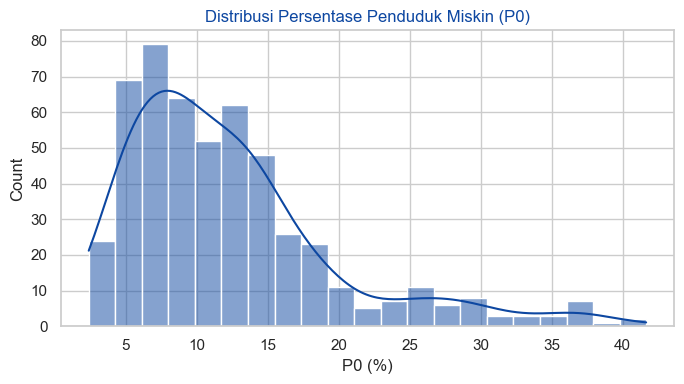

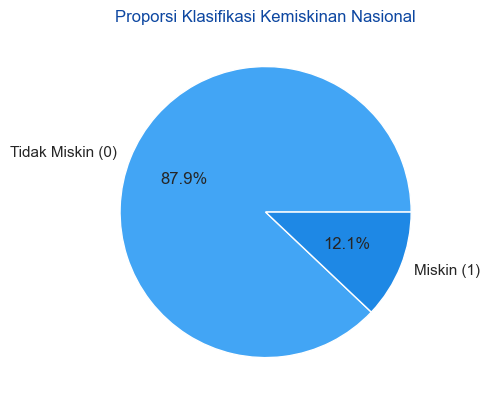

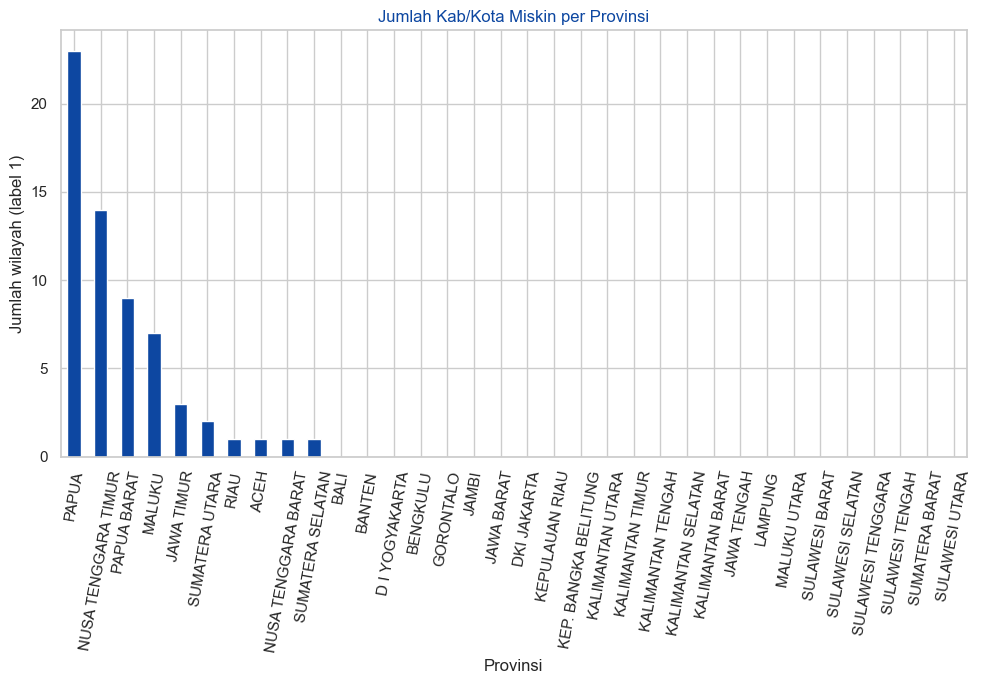

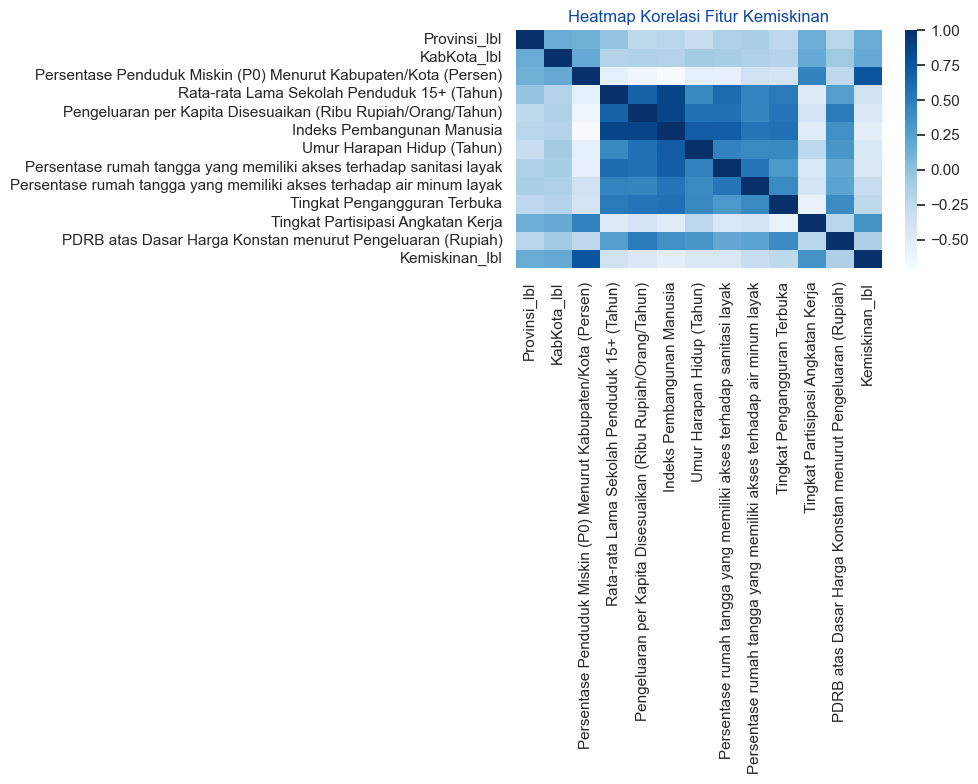

In [11]:
# =====================================================
# Grafik tambahan untuk Dashboard
# =====================================================

# Distribusi P0
plt.figure(figsize=(7, 4))
sns.histplot(
    df['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'],
    kde=True,
    color=BLUE
)
plt.title("Distribusi Persentase Penduduk Miskin (P0)", color=BLUE)
plt.xlabel("P0 (%)")
plt.tight_layout()
plt.savefig(os.path.join(CHART_DIR, "p0_distribution.png"), dpi=120)
plt.show()


# Pie chart klasifikasi kemiskinan
plt.figure(figsize=(5, 5))
df['Kemiskinan_lbl'].value_counts().plot(
    kind='pie',
    colors=["#42A5F5", "#1E88E5"],
    labels=['Tidak Miskin (0)', 'Miskin (1)'],
    autopct='%1.1f%%'
)
plt.title("Proporsi Klasifikasi Kemiskinan Nasional", color=BLUE)
plt.ylabel("")
plt.tight_layout()
plt.savefig(os.path.join(CHART_DIR, "kemiskinan_pie.png"), dpi=120)
plt.show()


# Jumlah kab/kota miskin per provinsi
miskin_per_prov = df.groupby('Provinsi')['Kemiskinan_lbl'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 7))
miskin_per_prov.plot(
    kind='bar',
    color=BLUE
)
plt.title("Jumlah Kab/Kota Miskin per Provinsi", color=BLUE)
plt.ylabel("Jumlah wilayah (label 1)")
plt.xticks(rotation=80)
plt.tight_layout()
plt.savefig(os.path.join(CHART_DIR, "miskin_per_provinsi.png"), dpi=120)
plt.show()


# Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(
    df[fitur + ['Kemiskinan_lbl']].corr(),
    annot=False,
    cmap="Blues"
)
plt.title("Heatmap Korelasi Fitur Kemiskinan", color=BLUE)
plt.tight_layout()
plt.savefig(os.path.join(CHART_DIR, "korelasi.png"), dpi=120)
plt.show()

In [12]:
# =====================================================
# Simpan model
# =====================================================
with open(os.path.join(MODEL_DIR, "model_kemiskinan.pkl"), "wb") as f:
    pickle.dump(rf, f)

print("💾 Model disimpan di: model/model_kemiskinan.pkl")

print("\nKESIMPULAN SINGKAT:")
print("1. Model Random Forest berhasil dilatih untuk klasifikasi kemiskinan 0/1.")
print("2. Grafik evaluasi (confusion, roc, importance) disimpan di static/charts.")
print("3. Grafik eksplorasi (P0, pie, per-provinsi, korelasi) juga disimpan untuk Dashboard.")

💾 Model disimpan di: model/model_kemiskinan.pkl

KESIMPULAN SINGKAT:
1. Model Random Forest berhasil dilatih untuk klasifikasi kemiskinan 0/1.
2. Grafik evaluasi (confusion, roc, importance) disimpan di static/charts.
3. Grafik eksplorasi (P0, pie, per-provinsi, korelasi) juga disimpan untuk Dashboard.


In [13]:
import sklearn
print(sklearn.__version__)

1.5.2
